In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!mkdir ../data/preprocessed
!mkdir ../Algorithms

df = pd.read_csv("../data/start-data.csv")
#drop frozen item column
df = df.drop(columns=["frozen_item",'cold_item'])

mkdir: ../data/preprocessed: File exists
mkdir: ../Algorithms: File exists


# Data Preprocessing

## Feature Engineering

### Creating New Features From Category Names

In [2]:
cold_item_types = [
                    "Gazlı İçecek",
                    "Ayran & Kefir",
                    "Süt",
                    "Peynir",
                    "Migros Dondurma",
                    "Yoğurt",
                    "Tek Dondurma",
                    "Tereyağ & Margarin",
                    "Kap Dondurma",
                    "Meyve Suyu",
                    "Soğuk Kahve",
                    "Enerji İçeceği",
                    "Tereyağ",
                    "Şalgam"
                    ]

frozen_item_types = [
                    "Beyaz Et",
                    "Kırmızı Et",
                    "Et Şarküteri",
                    "Pizza",
                    "Mantı",
                    "Dondurulmuş Gıda",
                    "Sakatat",
                    "Donuk Fırın",
                    "Dondurulmuş",
                    "Balık",
                    "Buz"
                    ]

scalable_item_types = [
                      "Sebze",
                      "Meyve",
                      "Yeşillik",
                      ]

In [3]:
'''
# This function checks if any item types are present in the given category names.

# Arguments:
#   category_names (str): A comma-separated string containing category names.
#   item_types (iterable): An iterable collection of item types to search for.

# Returns:
#   int: The number of item types found in the category names.
'''
def contains_items(category_names, item_types):
    if isinstance(category_names, str):
        categories = category_names.split(',')
        item_count = 0
        for category in categories:
            if any(item.strip() in item_types for item in category.split(',')):
                item_count += 1
        return item_count
    else:
        return 0

In [4]:
# Apply the function to create the frozen_item column
df['frozen_item'] = df['category_names'].apply(lambda x: contains_items(x, frozen_item_types))
print("Frozen item column added to df")

# Apply the function to create the cold_item column
df['cold_item'] = df['category_names'].apply(lambda x: contains_items(x, cold_item_types))
print("Cold item column added to df")

# Apply the function to create the scalable_item column
df['scalable_item'] = df['category_names'].apply(lambda x: contains_items(x, scalable_item_types))
print("Scalable item column added to df")

Frozen item column added to df
Cold item column added to df
Scalable item column added to df


In [5]:
df

,packet_date,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,frozen_item,cold_item,scalable_item
0,2023-01-30 16:25:56.531971 UTC,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,3,6
1,2023-01-13 17:39:56.963085 UTC,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,11
2,2023-12-16 13:39:03.726051 UTC,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,3,1
3,2023-02-11 13:37:56.262404 UTC,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",1,0,2
4,2023-01-04 10:36:28.288366 UTC,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",2,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1438813,2023-05-14 22:03:55.03007 UTC,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,8
1438814,2023-05-02 09:03:42.533162 UTC,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,7,0
1438815,2023-02-13 15:23:39.449954 UTC,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",4,2,2
1438816,2023-03-26 17:25:06.829762 UTC,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8


### Creating New Features From Packet Dates

In [6]:
# Convert the 'packet_date' column to datetime
df['packet_date'] = pd.to_datetime(df['packet_date'], format='%Y-%m-%d %H:%M:%S.%f %Z')

# Extract the month, day of the week, and hour from the 'packet_date' column
df['month'] = df['packet_date'].dt.month
df['day'] = df['packet_date'].dt.dayofweek
df['hour'] = df['packet_date'].dt.hour

print("Columns month, day, and hour added to df")

Columns month, day, and hour added to df


In [7]:
# check if the packet_date column contains holidays
import holidays

tr_holidays = holidays.Turkey()
df['is_holiday'] = df['packet_date'].apply(lambda x: 1 if x in tr_holidays else 0)
print("is_holiday column added to order_date.csv.")
#check how many holiday orders are there in the dataset
df.drop(columns=['packet_date'], inplace=True)
print("Number of holidays in the dataset: ", df['is_holiday'].sum())

is_holiday column added to order_date.csv.
Number of holidays in the dataset:  45145


In [8]:
print("Number of holidays in the dataset: ", df['is_vip'].sum())

Number of holidays in the dataset:  4423


In [9]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,frozen_item,cold_item,scalable_item,month,day,hour,is_holiday
0,231986020,66538886,13.014113,21,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,3,6,1,0,16,0
1,226345108,64279854,17.366667,17,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,11,1,4,17,0
2,355151082,113977388,8.745382,17,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,3,1,12,5,13,0
3,235698212,68008610,13.951483,19,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",1,0,2,2,5,13,0
4,223149961,63047012,5.822497,12,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",2,0,4,1,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,13.735969,17,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,8,5,6,22,0
1438814,262597520,78757438,10.733333,17,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,7,0,5,1,9,0
1438815,236659316,68303121,8.816667,17,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",4,2,2,2,0,15,0
1438816,250406920,73772482,13.550000,17,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8,3,6,17,0


## Data Cleaning

### Removing Outliers

In [10]:
# Get the number of rows before filtering
num_rows_before = df.shape[0]

# Below 1 min collection durations are not possible and above 30 min collection durations are not delivered.
df = df[(df['collection_duration'] > 1) & (df['collection_duration'] < 30)]

# Get the number of rows after filtering
num_rows_after = df.shape[0]

# Calculate the number of rows removed
num_rows_removed = num_rows_before - num_rows_after

print("Number of rows removed:", num_rows_removed)

Number of rows removed: 21868


Since the dataset is real life data, we need to remove it sensibly. So we will use the IQR method with multivariate outlier detection. As a Our target and our features.

In [11]:
cols = ['frozen_item', 'cold_item', 'scalable_item', 'item_count', 'hour', 'month', 'day', 'collection_duration']

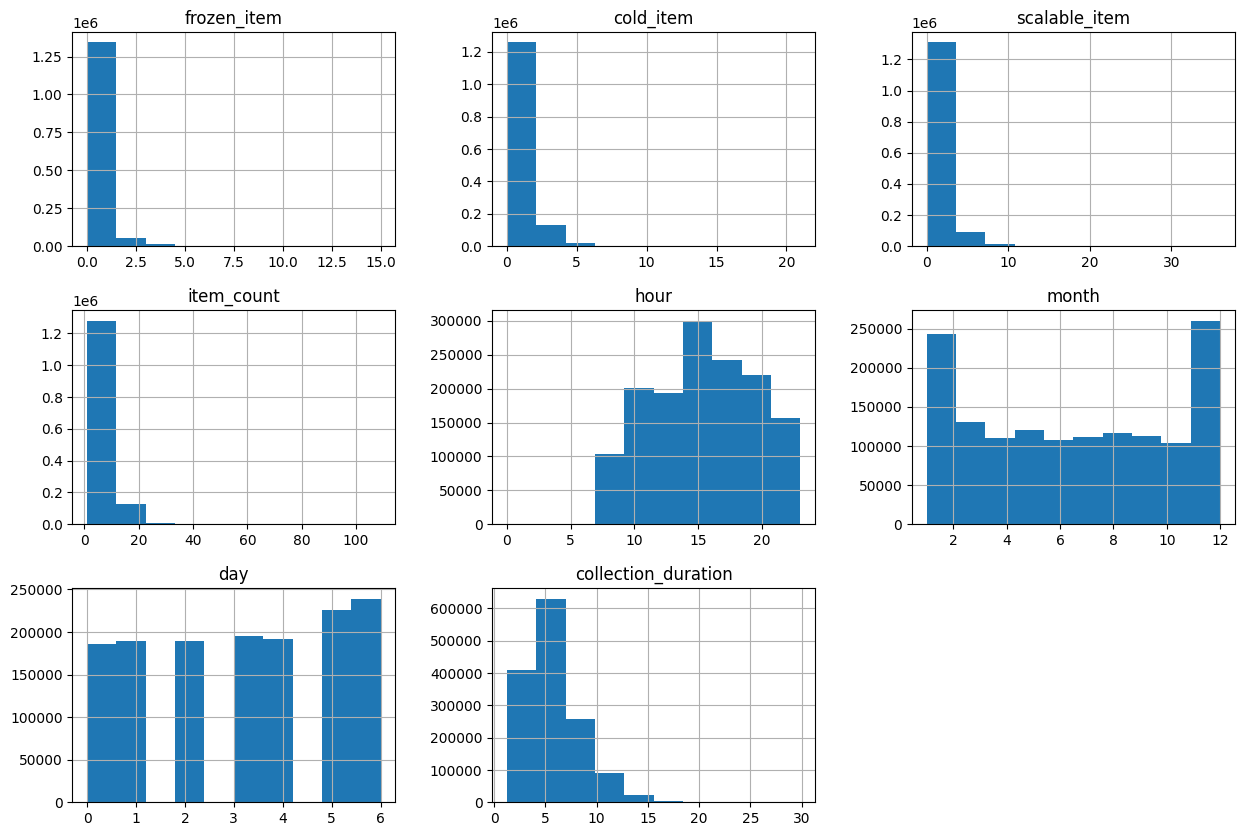

In [12]:
df[cols].hist(figsize=(15,10));

Our main features are hardly right skewed so we will use log transformation to make them more normal.And do univariate outlier detection.

In [13]:
# nplog transformation function as parameters df and column name
def nplog_function(df, column_name):
    df.loc[:, column_name] = np.log1p(df[column_name])
    df[column_name].hist(figsize=(10,5))

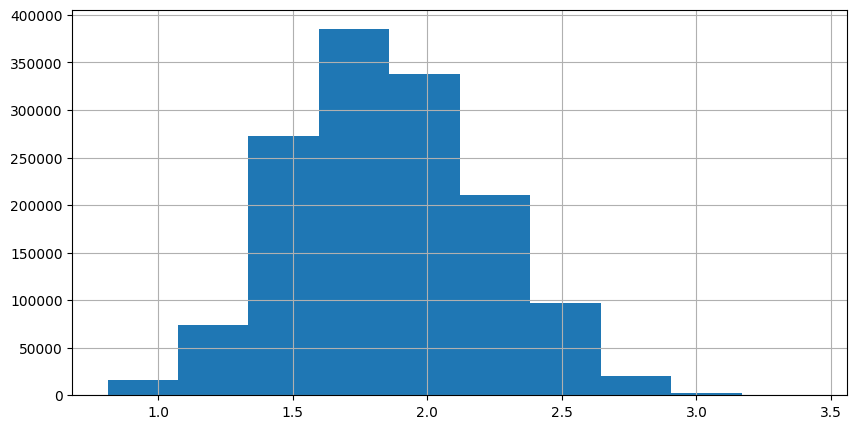

In [14]:
nplog_function(df, 'collection_duration')

/var/folders/6l/ywk92fbn0kj4z5tq_ngb9ttw0000gn/T/ipykernel_17237/3802964814.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.09104245 2.89037176 2.89037176 ... 2.89037176 2.89037176 2.89037176]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, column_name] = np.log1p(df[column_name])


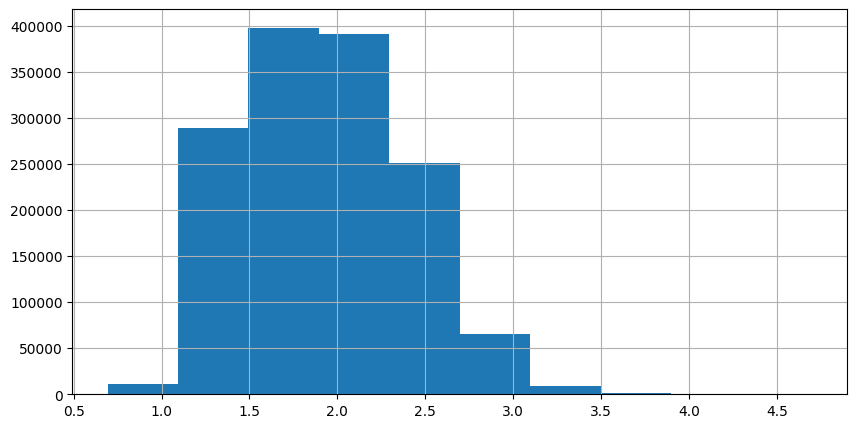

In [15]:
nplog_function(df, 'item_count')

In [16]:
df

,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,frozen_item,cold_item,scalable_item,month,day,hour,is_holiday
0,231986020,66538886,2.640065,3.091042,False,"Meyve,Sebze,Sebze,Peynir,Zeytin,Bakliyat,Mutfa...","GRAM,GRAM,GRAM,GRAM,GRAM,PIECE,PIECE,PIECE,PIE...",0,3,6,1,0,16,0
1,226345108,64279854,2.910537,2.890372,False,"Sebze,Konserve & Turşu,Meyve,Bakliyat,Meyve,Me...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",0,0,11,1,4,17,0
2,355151082,113977388,2.276794,2.890372,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,3,1,12,5,13,0
3,235698212,68008610,2.704811,2.995732,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",1,0,2,2,5,13,0
4,223149961,63047012,1.920225,2.564949,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",2,0,4,1,2,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,2.690291,2.890372,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,8,5,6,22,0
1438814,262597520,78757438,2.462434,2.890372,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,7,0,5,1,9,0
1438815,236659316,68303121,2.284082,2.890372,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",4,2,2,2,0,15,0
1438816,250406920,73772482,2.677591,2.890372,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8,3,6,17,0


In [17]:
"""
# This function detects and prints Interquartile Range (IQR) outliers in a pandas DataFrame column.

# Args:
    # df (pd.DataFrame): The DataFrame containing the data.
    # column_name (str): The name of the column to analyze for outliers.

# Returns:
    # tuple(float, float): A tuple containing the lower and upper bound values for outliers.

# Prints:
    # - IQR value
    # - Lower bound value
    # - Upper bound value
    # - Total number of outliers detected
"""
def univariate_out_iqr_print(df, column_name):
    q25, q75 = np.quantile(df[column_name], 0.25), np.quantile(df[column_name], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR:', iqr)
    print('Lower bound value:', lower)
    print('Upper bound value:', upper)

    df_up_out = df[df[column_name] > upper]
    df_low_out = df[df[column_name] < lower]

    total_outliers = df_up_out.shape[0] + df_low_out.shape[0]
    print('Total number of outliers are:', total_outliers)

    return lower, upper


In [18]:
"""
# This function plots a histogram with IQR outliers highlighted and removes outliers from the DataFrame.

    Args:
    # df (pd.DataFrame): The DataFrame containing the data.
    # column_name (str): The name of the column to analyze for outliers.
    # lower (float): The lower bound value for outliers.
    # upper (float): The upper bound value for outliers.

# Returns:
    # pd.DataFrame: The DataFrame with outliers replaced by NaNs and transformed if necessary (e.g., for item_count column).
"""
def univariate_out_iqr_plot(df, column_name, lower, upper):

    df[column_name].hist(figsize=(10,5))
    plt.axvspan(xmin=lower, xmax=df[column_name].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[column_name].max(), alpha=0.2, color='red')
    plt.show()
    
    
    # df_cleaned = df[(df[column_name] >= lower) & (df[column_name] <= upper)]
    df.loc[(df[column_name] < lower) | (df[column_name] > upper), column_name] = np.nan
    if column_name == 'item_count':
        df.loc[~df[column_name].isna(), column_name] = round(np.expm1(df.loc[~df[column_name].isna(), column_name]))
    else:
        df.loc[~df[column_name].isna(), column_name] = np.expm1(df.loc[~df[column_name].isna(), column_name])
    return df

In [19]:
lower, upper = univariate_out_iqr_print(df, 'collection_duration')

IQR: 0.5069905863002475
Lower bound value: 0.8305414615021527
Upper bound value: 2.8585038067031427
Total number of outliers are: 3552


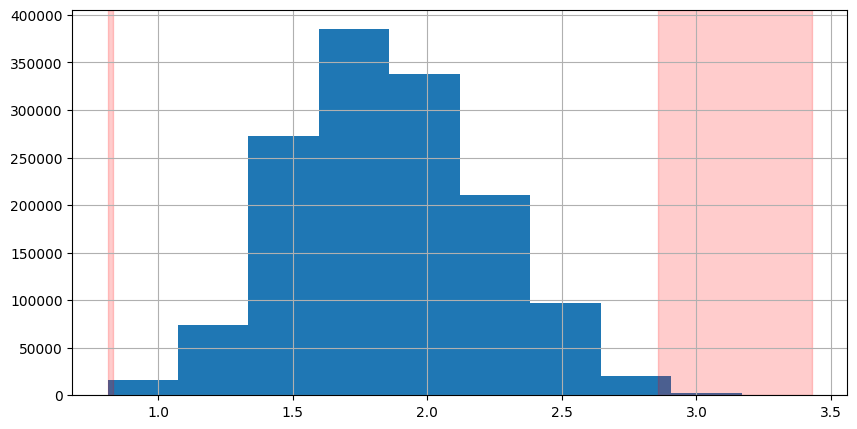

In [20]:
df = univariate_out_iqr_plot(df, 'collection_duration', lower, upper)

In [21]:
lower, upper = univariate_out_iqr_print(df, 'item_count')

IQR: 0.5877866649021193
Lower bound value: 0.7277579150809214
Upper bound value: 3.0789045746893984
Total number of outliers are: 24225


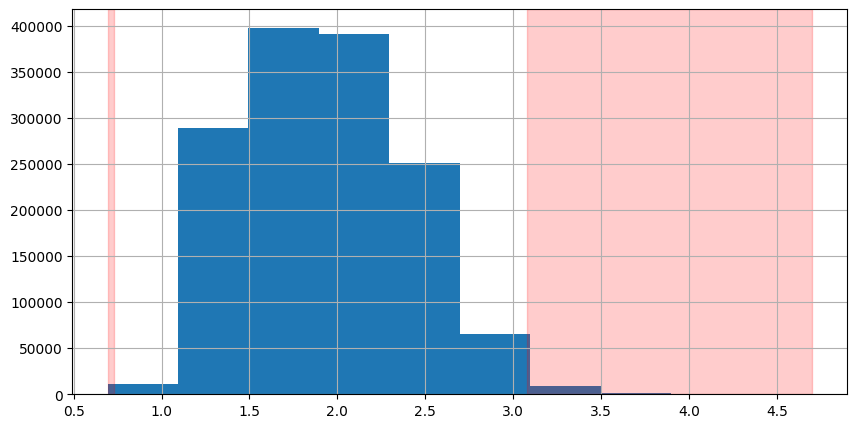

In [22]:
df = univariate_out_iqr_plot(df, 'item_count', lower, upper)

In [23]:
 # Drop rows(outliers) which i have converted to nan
df.dropna(inplace=True)
df

/var/folders/6l/ywk92fbn0kj4z5tq_ngb9ttw0000gn/T/ipykernel_17237/1082701969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,order_id,package_id,collection_duration,item_count,is_vip,category_names,units,frozen_item,cold_item,scalable_item,month,day,hour,is_holiday
2,355151082,113977388,8.745382,17.0,False,"Ayran & Kefir,Kuruyemiş,Yumurta,Bar Çikolata,K...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,3,1,12,5,13,0
3,235698212,68008610,13.951483,19.0,False,"Kedi,Meyve,Kedi,Beyaz Et,Kraker,Bisküvi,Şekerl...","PIECE,GRAM,PIECE,GRAM,PIECE,PIECE,PIECE,PIECE,...",1,0,2,2,5,13,0
4,223149961,63047012,5.822497,12.0,False,"Sebze,Et Şarküteri,Sütlü Tatlı, Krema,Mutfak E...","GRAM,PIECE,PIECE,PIECE,PIECE,GRAM,GRAM,GRAM,PI...",2,0,4,1,2,10,0
6,278943542,85253128,4.966667,18.0,False,"Gazlı İçecek,Yeşillik,Sakız & Şekerleme,Bahara...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",2,3,8,6,4,10,0
7,232291169,66646133,6.268673,15.0,False,"Kuruyemiş,Sebze,Çöp Poşeti,Sos,Kağıt Ürünleri,...","GRAM,GRAM,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,...",0,0,2,1,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438813,267250768,80626839,13.735969,17.0,False,"Sebze,Kuruyemiş,Et Şarküteri,Meyve,Meyve,Sebze...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,0,8,5,6,22,0
1438814,262597520,78757438,10.733333,17.0,False,"Peynir,Meyve Suyu,Ekmek,Peynir,Peynir,Meyve Su...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,7,0,5,1,9,0
1438815,236659316,68303121,8.816667,17.0,False,"Et Şarküteri,Sebze,Çay,Peynir,Bulaşık,Kağıt,Ma...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",4,2,2,2,0,15,0
1438816,250406920,73772482,13.550000,17.0,False,"Unlu Mamüller,Sebze,Ekmek,Yeşillik,Bulaşık,Yeş...","PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIECE,PIEC...",1,1,8,3,6,17,0


In [24]:
"""
# This function removes outliers from a DataFrame (`data`) based on the Interquartile Range (IQR) method.

# Args:
#    data (pd.DataFrame): The input DataFrame containing the data.
#    group (list): A list of column names in `data` to be used for grouping. Outlier removal is done
#                  within each unique combination of group values.
#    column (str): The name of the column containing numerical data where outliers will be removed.

# Returns:
#    pd.DataFrame: A new DataFrame with outliers removed based on the IQR method within each group.
"""

def remove_outliers_iqr(data, group, column):
    # Group data by x and calculate IQR and outliers
    groups = data.groupby(group, observed=False)
    filtered_data = []
    
    for _, group_data in groups:
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter data within the bounds
        filtered_group_data = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
        filtered_data.append(filtered_group_data)

    #Print the number of rows removed

    print("Number of rows removed:", len(data) - pd.concat(filtered_data).shape[0])

    return pd.concat(filtered_data)

# # Usage
df = remove_outliers_iqr(df, [
                              'cold_item', 'frozen_item',
                              'scalable_item', 'item_count',
                              'day','hour','month'
                             ],
                              'collection_duration')


Number of rows removed: 36687


In [25]:
# Randomize df
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### Null and Duplicate Values

In [26]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_counts)

# Check if there are any duplicates
num_duplicates = df.duplicated(subset=['order_id', 'package_id']).sum()
print("Number of duplicate rows:", num_duplicates)

Number of null values in each column:
order_id               0
package_id             0
collection_duration    0
item_count             0
is_vip                 0
category_names         0
units                  0
frozen_item            0
cold_item              0
scalable_item          0
month                  0
day                    0
hour                   0
is_holiday             0
dtype: int64
Number of duplicate rows: 0


In [27]:
# Check if there are any duplicates keep first for order & package id
df.drop_duplicates(subset=['order_id', 'package_id'], keep='first', inplace=True)
# Drop null values
df.dropna(inplace=True)
# Drop the columns that are not needed
df.drop(columns=['package_id','order_id','units'], inplace=True)

In [28]:
df

,collection_duration,item_count,is_vip,category_names,frozen_item,cold_item,scalable_item,month,day,hour,is_holiday
0,2.850000,4.0,False,"Bebek Maması,Bebek Bezi,Bebek Maması",0,0,0,3,2,10,0
1,3.850000,9.0,False,"Maden Suyu,Ekmek,Ayran & Kefir,Makarna,Gazlı İ...",2,2,0,12,6,22,0
2,6.316667,3.0,False,"Süt,Kahve",0,1,0,4,5,19,0
3,5.850000,4.0,False,"Kek,Gofret,Yoğurt,Konserve & Turşu",0,1,0,3,2,17,0
4,6.083333,9.0,False,"Temizlik,Baton Çikolata,Temizlik,Bar Çikolata,...",1,1,0,2,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...
1354858,5.916667,3.0,False,"Bakliyat,Hızlı Yemek",0,0,0,9,5,13,0
1354859,7.316667,7.0,False,"Ekmek,Yumurta,Sandviç,Çikolata & Kahvaltı,Ekme...",0,0,0,10,1,17,0
1354860,3.786058,4.0,False,"Ekmek,Su,Gofret",0,0,0,8,0,13,0
1354861,5.932712,4.0,False,"Peynir,Taze Fırın,Taze Fırın",0,1,0,8,6,14,0


# Data Analysis

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

## Boxplot Analysis

In [30]:
#How many rows each "day" column has in the data
print(df['day'].value_counts())

#Plot the mean of the "toplama_süresi" column for each day of the week instead of 0123456 Used Day names
df['day'] = df['day'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df['day'] = pd.Categorical(df['day'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

day
6    228635
5    216035
3    187317
4    183280
1    181522
2    180806
0    177268
Name: count, dtype: int64


In [31]:
'''
# This function creates a boxplot to visualize the distribution of a numerical variable (y)
# across different categories (x) in a DataFrame (data).

# Args:
#     data (pd.DataFrame): The DataFrame containing the data to be visualized.
#     x (str): The name of the column in `data` representing the categorical variable.
#     y (str): The name of the column in `data` containing the numerical variable to be plotted.
#     xlabel (str): The label for the x-axis (categorical variable).
#     tight (bool, optional): A flag to control the layout of the plot. If True, rotates x-axis labels
#                             for better readability and applies tight layout. Defaults to False.

# Returns:
#     Creates a boxplot visualization.
'''

def plot_boxplot( x, y, data, xlabel, tight=False):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, hue=x, showfliers=False)
    plt.xlabel(xlabel)
    plt.ylabel("Collection Time (min)")
    plt.title("Boxplot of Collection Duration by " + xlabel)
    if(tight==True):
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()
    print(df.groupby(x, observed=False)[y].mean())

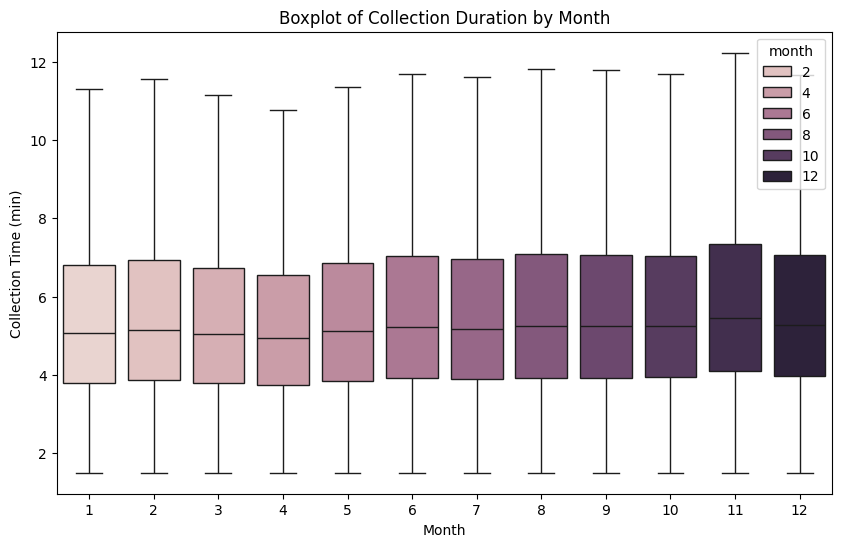

month
1     5.562195
2     5.672485
3     5.532325
4     5.404965
5     5.617652
6     5.751055
7     5.697016
8     5.767767
9     5.768248
10    5.754042
11    5.974087
12    5.792691
Name: collection_duration, dtype: float64


In [32]:
plot_boxplot('month', 'collection_duration', df, 'Month')

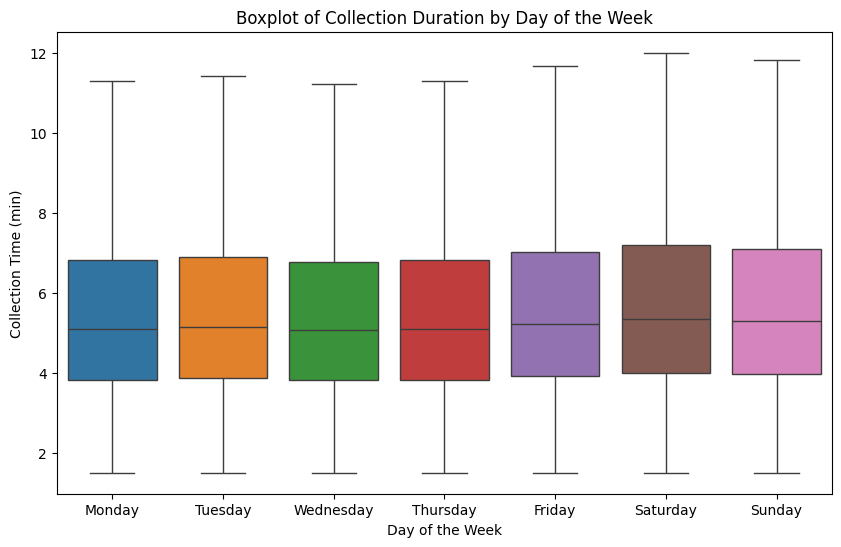

day
Monday       5.584653
Tuesday      5.639602
Wednesday    5.564897
Thursday     5.590365
Friday       5.730254
Saturday     5.862875
Sunday       5.803685
Name: collection_duration, dtype: float64


In [33]:
plot_boxplot('day', 'collection_duration', df, 'Day of the Week')

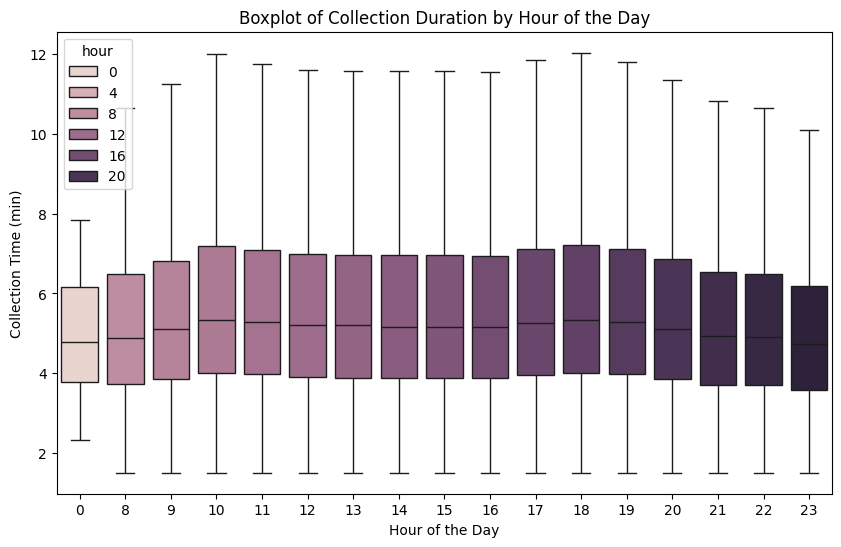

hour
0     5.163187
8     5.388525
9     5.612607
10    5.864684
11    5.795085
12    5.712396
13    5.709456
14    5.698188
15    5.696981
16    5.692302
17    5.795432
18    5.862604
19    5.797315
20    5.611641
21    5.383154
22    5.339604
23    5.123846
Name: collection_duration, dtype: float64


In [34]:
plot_boxplot('hour', 'collection_duration', df, 'Hour of the Day')

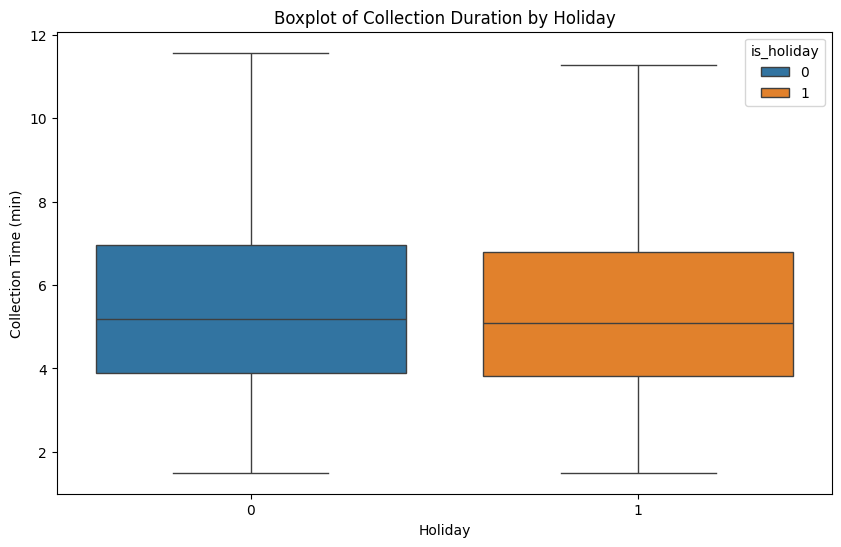

is_holiday
0    5.694784
1    5.569838
Name: collection_duration, dtype: float64


In [35]:
plot_boxplot('is_holiday', 'collection_duration', df, 'Holiday')

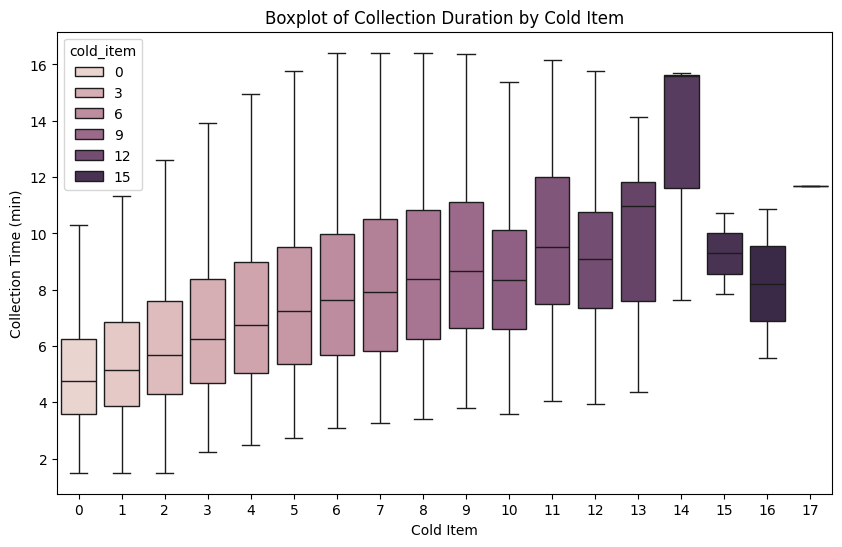

cold_item
0      5.177627
1      5.632177
2      6.210285
3      6.793795
4      7.257964
5      7.661199
6      8.003211
7      8.278492
8      8.715526
9      8.934291
10     8.651485
11     9.841992
12     9.269183
13     9.795153
14    12.972222
15     9.289890
16     8.216667
17    11.683333
Name: collection_duration, dtype: float64


In [36]:
plot_boxplot('cold_item', 'collection_duration', df, 'Cold Item')

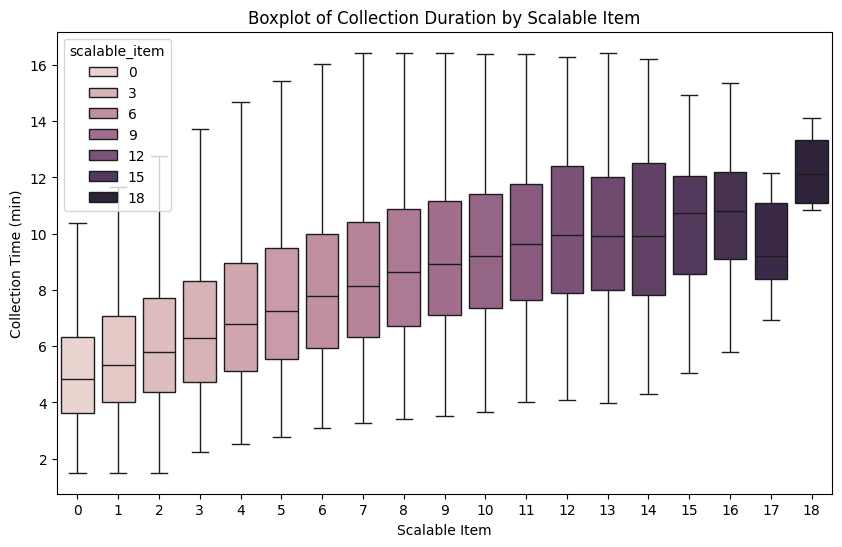

scalable_item
0      5.230403
1      5.822241
2      6.310447
3      6.778429
4      7.253565
5      7.697386
6      8.123384
7      8.496427
8      8.896960
9      9.197998
10     9.430462
11     9.758944
12    10.117614
13    10.079913
14    10.087035
15    10.396666
16    10.682886
17     9.548533
18    12.299888
Name: collection_duration, dtype: float64


In [37]:
plot_boxplot('scalable_item', 'collection_duration', df, 'Scalable Item')

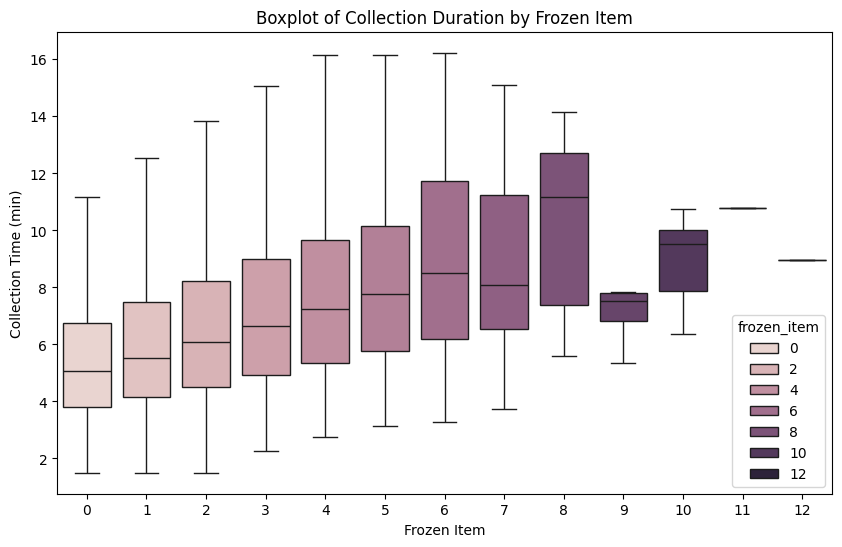

frozen_item
0      5.534285
1      6.081366
2      6.627524
3      7.175885
4      7.685237
5      8.177229
6      8.878692
7      8.715736
8     10.377875
9      7.680218
10     8.904962
11    10.800000
12     8.950000
Name: collection_duration, dtype: float64


In [38]:
plot_boxplot('frozen_item', 'collection_duration', df, 'Frozen Item')

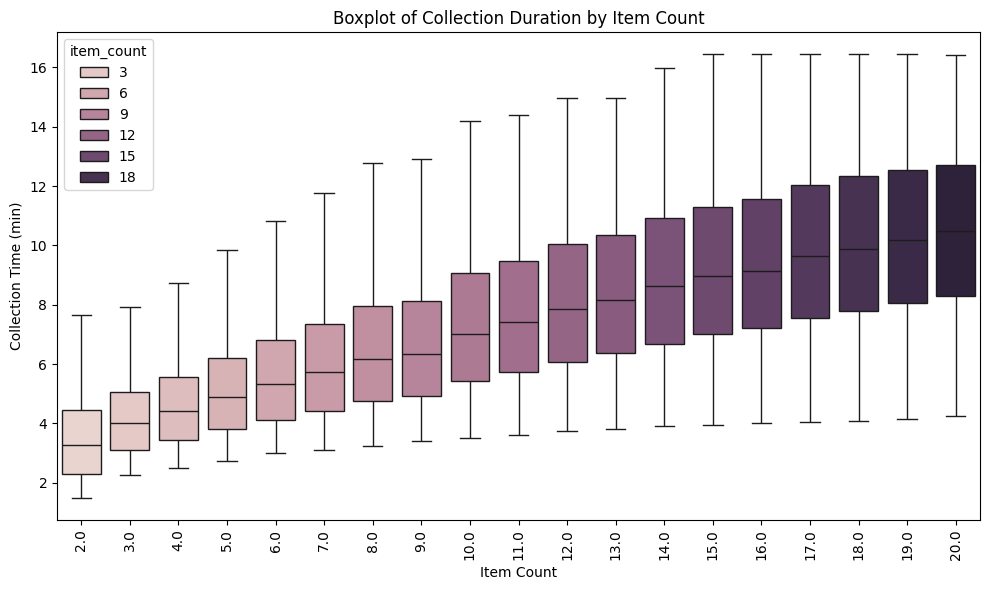

item_count
2.0      3.495387
3.0      4.207311
4.0      4.626789
5.0      5.154687
6.0      5.646886
7.0      6.042852
8.0      6.520010
9.0      6.806042
10.0     7.379758
11.0     7.718388
12.0     8.163682
13.0     8.420758
14.0     8.879977
15.0     9.215599
16.0     9.418433
17.0     9.816530
18.0    10.018664
19.0    10.230001
20.0    10.450061
Name: collection_duration, dtype: float64


In [39]:
plot_boxplot('item_count', 'collection_duration', df, 'Item Count', True)

## Unique Category Analysis

In [40]:
# Initializing an empty set to store unique categories
unique_categories = set()
unique_categories_counts = {}
category_collection_times = {}

'''
# This function processes a single row from a DataFrame and updates dictionaries
# tracking unique category counts and collection times.

# Arguments:
#   row (pandas.Series): A row from a DataFrame containing at least:
#       - 'category_names' (str): Comma-separated string of category names.
#       - 'collection_duration' (float): Collection duration for the item.
#   unique_categories_counts (dict): A dictionary to store counts of unique categories (key: category name, value: count).
#   category_collection_times (dict): A dictionary to store collection times for each category (key: category name, value: list of collection durations).
'''

def process_row(row, unique_categories_counts, category_collection_times):
    if pd.notna(row['category_names']):   
        categories = row['category_names'].split(',')      
        for category in categories:
            category = category.strip()
            unique_categories_counts[category] = unique_categories_counts.get(category, 0) + 1

            if category not in category_collection_times:
                category_collection_times[category] = [row['collection_duration']]
            else:
                category_collection_times[category].append(row['collection_duration'])

In [41]:
# Iterate through each row of the DataFrame
for index, row in df.iterrows():
   process_row(row, unique_categories_counts, category_collection_times)

# Convert the dictionary to a DataFrame
unique_categories_counts_df = pd.DataFrame(list(unique_categories_counts.items()),
                                           columns=['Unique Categories', 'Count'])

# Sort the DataFrame by the count in descending order and give them rankings
unique_categories_counts_df['Rank'] = unique_categories_counts_df['Count'].rank(ascending=False)
unique_categories_counts_df.sort_values(by='Rank', inplace=True)
unique_categories_counts_df = unique_categories_counts_df.drop(columns='Count')

# Calculate the average collection time for each unique category
average_collection_time = {}
for category, times in category_collection_times.items():
    average_collection_time[category] = sum(times) / len(times)


# Add a new column in unique_categories_counts_df to store the average collection time
unique_categories_counts_df['average_collection_time'] = unique_categories_counts_df['Unique Categories'].map(average_collection_time)

In [42]:
unique_categories_counts_df

,Unique Categories,Rank,average_collection_time
23,Sebze,1.0,7.086399
40,Meyve,2.0,6.986604
3,Ekmek,3.0,6.283815
42,Cips,4.0,6.522879
9,Süt,5.0,6.412677
...,...,...,...
216,Baton,220.0,5.530027
217,Isıtma,221.5,5.156865
218,Soğutma,221.5,5.156865
222,Yetiştirme Kiti,223.0,8.144544


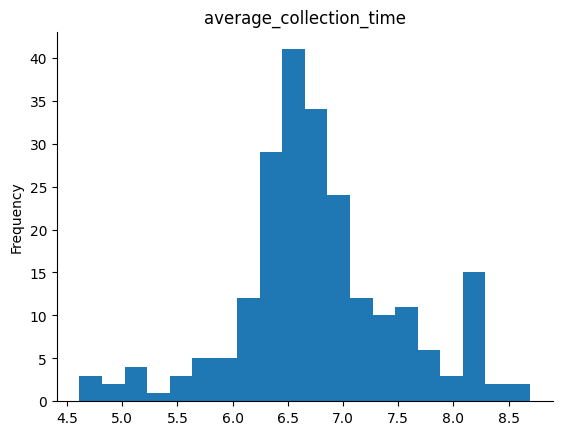

In [43]:
unique_categories_counts_df['average_collection_time'].plot(kind='hist', bins=20, title='average_collection_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
# Can remove else part didn't use it but can be used for further analysis
def plot_barplot(x, y, data, xlabel, tight=False):
    num_parts = 3
    part_size = len(data) // num_parts

    if tight:
        for i in range(num_parts):
            start_index = i * part_size
            end_index = (i + 1) * part_size if i < num_parts - 1 else len(data)
            part_data = data[start_index:end_index]
            plt.figure(figsize=(10, 6))
            sns.barplot(x=x, y=y, data=part_data, hue=x)
            plt.xlabel(xlabel)
            plt.ylabel("Collection Time (min)")
            plt.title(f"Barplot of Collection Duration by {xlabel} (Part {i+1})")
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=x, y=y, data=data, hue=x)
        plt.xlabel(xlabel)
        plt.ylabel("Collection Time (min)")
        plt.title("Barplot of Collection Duration by " + xlabel)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


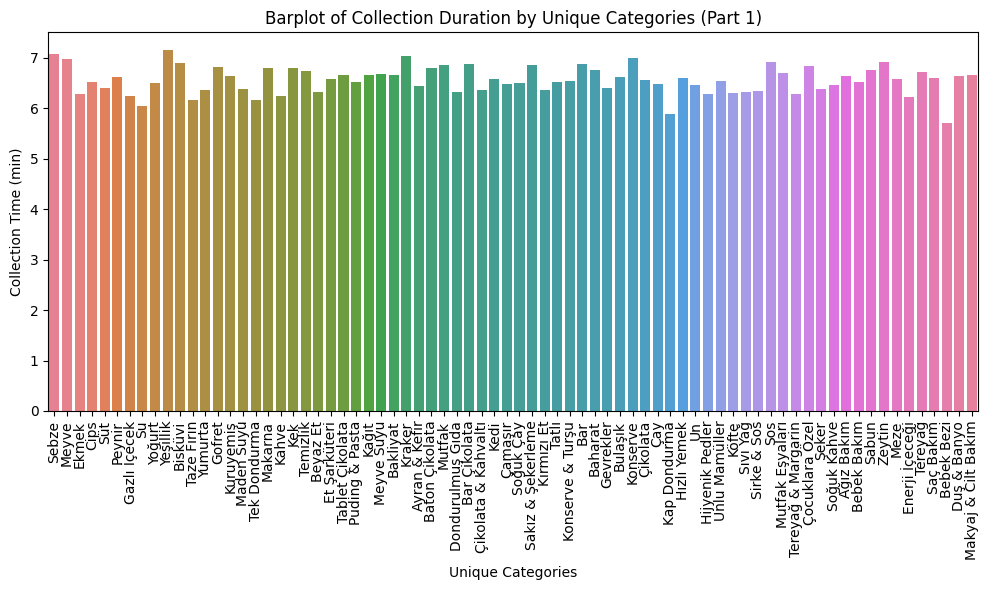

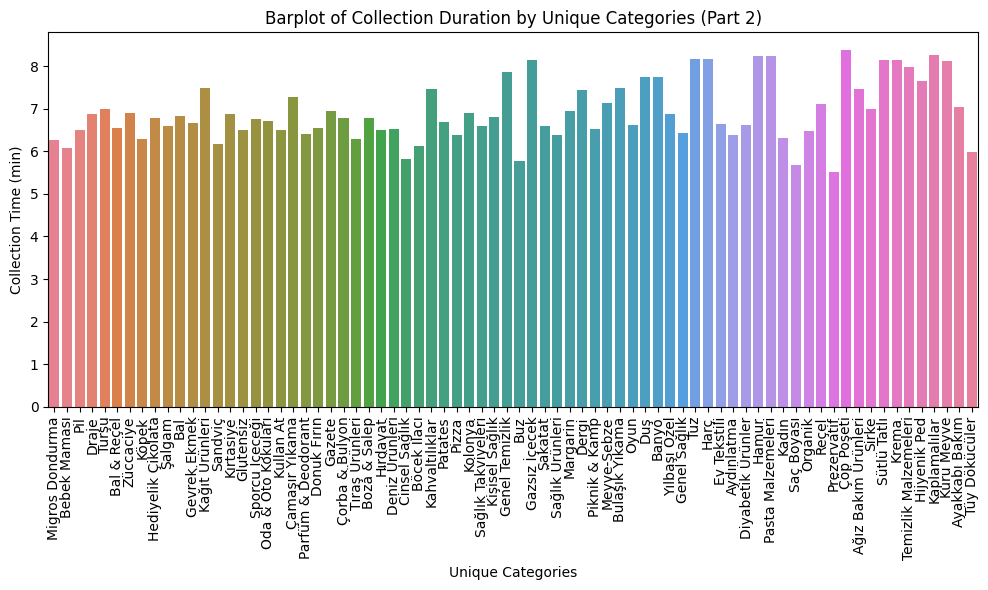

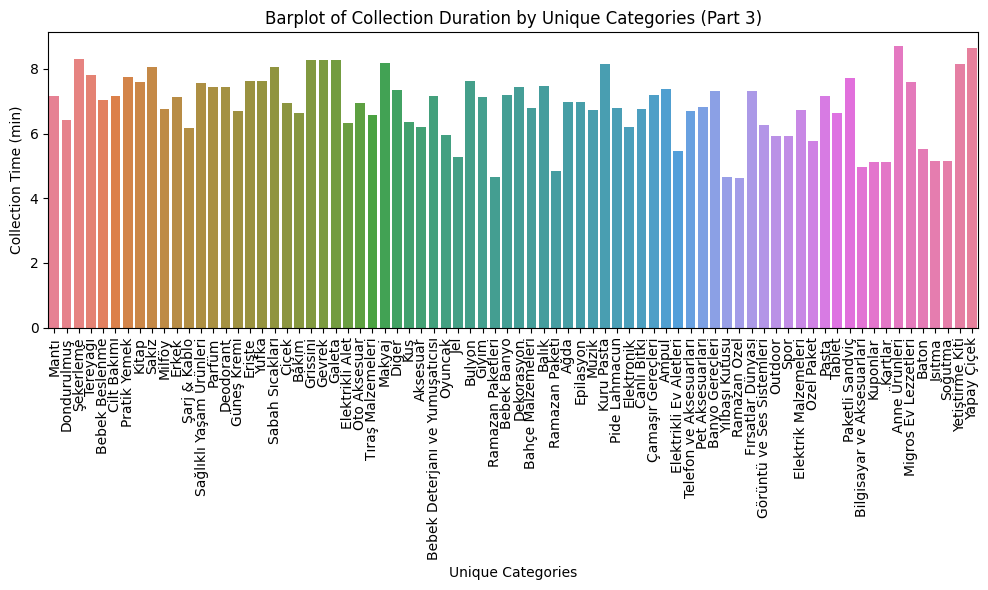

In [45]:
plot_barplot('Unique Categories', 'average_collection_time', unique_categories_counts_df, 'Unique Categories', True)

 Creating new feature with the calculation of average collection duration

In [46]:
# def calculate_metrics(row):
#     category_names = row['category_names']
#     if isinstance(category_names, str):
#         items = category_names.split(",")
#         average_collection_times = []
#         for item in items:
#             avg_time = unique_categories_counts_df.loc[unique_categories_counts_df['Unique Categories'] == item, 'average_collection_time'].values
#             if len(avg_time) > 0:
#                 average_collection_times.append(avg_time[0])

#         if average_collection_times:
#             avg_time = np.mean(average_collection_times)
#             return avg_time
#     return None

# df['average_collection_time'] = df.apply(calculate_metrics, axis=1)

In [47]:
df

,collection_duration,item_count,is_vip,category_names,frozen_item,cold_item,scalable_item,month,day,hour,is_holiday
0,2.850000,4.0,False,"Bebek Maması,Bebek Bezi,Bebek Maması",0,0,0,3,Wednesday,10,0
1,3.850000,9.0,False,"Maden Suyu,Ekmek,Ayran & Kefir,Makarna,Gazlı İ...",2,2,0,12,Sunday,22,0
2,6.316667,3.0,False,"Süt,Kahve",0,1,0,4,Saturday,19,0
3,5.850000,4.0,False,"Kek,Gofret,Yoğurt,Konserve & Turşu",0,1,0,3,Wednesday,17,0
4,6.083333,9.0,False,"Temizlik,Baton Çikolata,Temizlik,Bar Çikolata,...",1,1,0,2,Monday,13,0
...,...,...,...,...,...,...,...,...,...,...,...
1354858,5.916667,3.0,False,"Bakliyat,Hızlı Yemek",0,0,0,9,Saturday,13,0
1354859,7.316667,7.0,False,"Ekmek,Yumurta,Sandviç,Çikolata & Kahvaltı,Ekme...",0,0,0,10,Tuesday,17,0
1354860,3.786058,4.0,False,"Ekmek,Su,Gofret",0,0,0,8,Monday,13,0
1354861,5.932712,4.0,False,"Peynir,Taze Fırın,Taze Fırın",0,1,0,8,Sunday,14,0


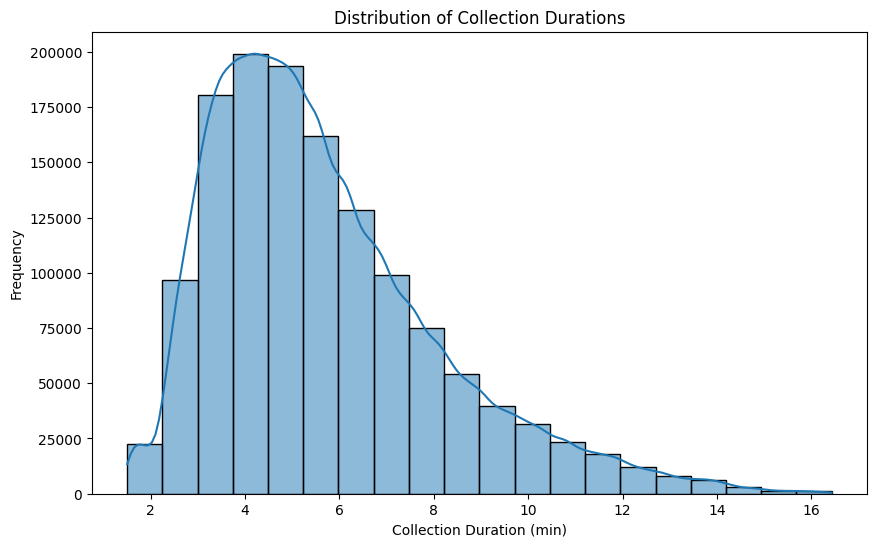

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['collection_duration'], bins=20, kde=True)
plt.title("Distribution of Collection Durations")
plt.xlabel("Collection Duration (min)")
plt.ylabel("Frequency")
plt.show()

# Normalization If Necessary

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# df[['item_count','cold_item','frozen_item','scalable_item']] = scaler.fit_transform(df[['item_count','cold_item','frozen_item','scalable_item']])

#normalize the all columns


# Save the Data

In [50]:
#order the data according to the paket_tarihi column which is the order date
# df = df.sort_values(by='packet_date')
df.to_csv('../data/preprocessed/main-data.csv', index=False)